<a href="https://colab.research.google.com/github/Riturajkumari/Titanic/blob/main/titanic_dataset_fare_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/titanic/train.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# look at numeric and categorical values separately 
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# list columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
#quick look at our data types & null counts 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:

df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#quick way to separate numeric columns
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

#### Univariate Analysis

In [ ]:
for col in ['Survived','Pclass', 'Age', 'Fare','SibSp','Parch']:
  min_val, max_val = df[col].min(), df[col].max()
  # print('Minimum value of ' + col + ' is ' + str(min_val) + ' and Maximum value of ' +   col + ' is ' + str(max_val))
  # print("Minimum value of ", col, " is ", min_val," and Maximum value of ", col," is ",max_val)
  print(f'Minimum value of {col} is {min_val} and Maximum value of {col} is {max_val}')


Minimum value of Survived is 0 and Maximum value of Survived is 1
Minimum value of Pclass is 1 and Maximum value of Pclass is 3
Minimum value of Age is 0.42 and Maximum value of Age is 80.0
Minimum value of Fare is 0.0 and Maximum value of Fare is 512.3292
Minimum value of SibSp is 0 and Maximum value of SibSp is 8
Minimum value of Parch is 0 and Maximum value of Parch is 6


In [ ]:
for col in ['Sex','Embarked']:
  vals = df[col].unique()
  print(f'Unique values/classes in {col} are {vals}' )

Unique values/classes in Sex are ['male' 'female']
Unique values/classes in Embarked are ['S' 'C' 'Q' nan]


### Handling missing values
-- dropping Cabin column due to s

In [ ]:
# drop the cabin column from the dataframe
df = df.drop(columns='Cabin', axis=1)

In [ ]:
# drop the name column beacuse mixed col from the dataframe
df = df.drop(columns='Name', axis=1)


In [ ]:
# drop the pessanger id  (unique id ) columns from the dataframe
df = df.drop(columns='PassengerId', axis=1)

In [ ]:

# drop the Ticket  (mixed col ) columns from the dataframe
df = df.drop(columns='Ticket', axis=1)

In [ ]:
# replacing the missing values in "Age" column with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:

## removing embarked null values and all col
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#showing rows and col
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


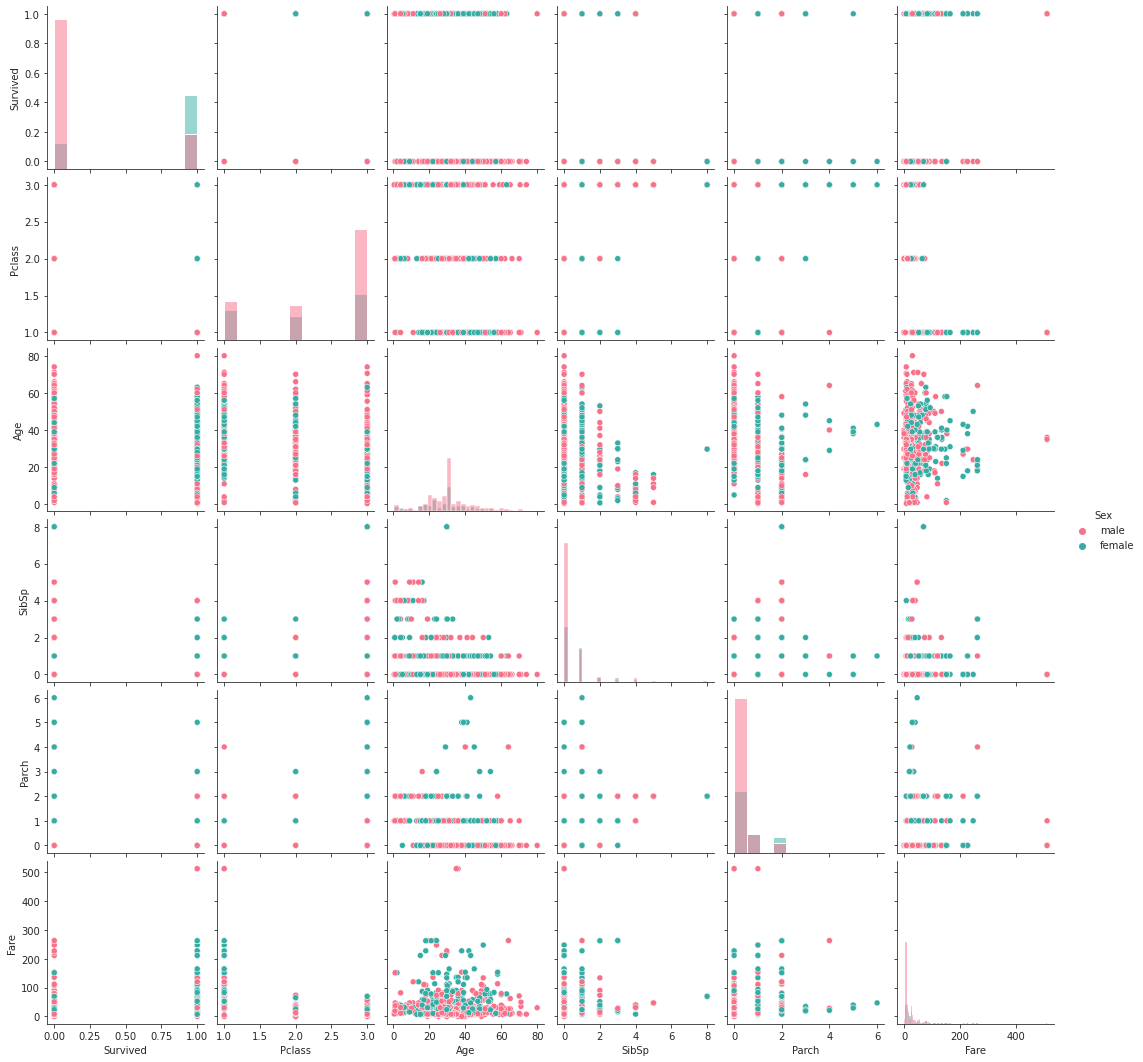

In [ ]:
# ultiple pairwise bivariate distributions in a dataset
sns.set_style("ticks")
sns.pairplot(df, hue='Sex', diag_kind="hist", kind="scatter", palette="husl")
plt.show()

In [ ]:
def get_distro(df,col):
  plt.figure(figsize=(18,6))

  plt.subplot(1,4,1)
  plt.hist(df[col],bins=30)
  plt.title('Hist')
  plt.subplot(1,4,2)
  stats.probplot(df[col],dist='norm',plot=plt)
  plt.ylabel('quantiles')
  plt.subplot(1,4,3)
  sns.boxplot(y=df[col])
  plt.title('Boxplot')
  plt.show()
  plt.subplot(1,4,4)
  sns.distplot(df[col], hist=False)
  plt.show()

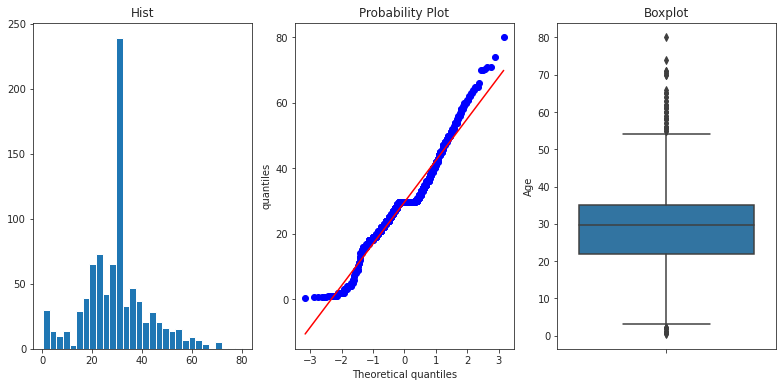

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


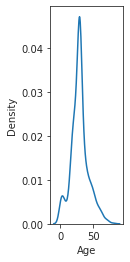

In [ ]:
get_distro(df,'Age')

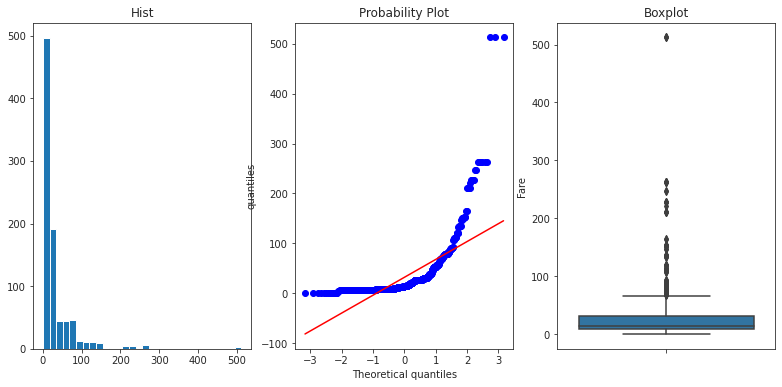

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


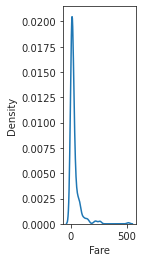

In [ ]:
get_distro(df,'Fare')

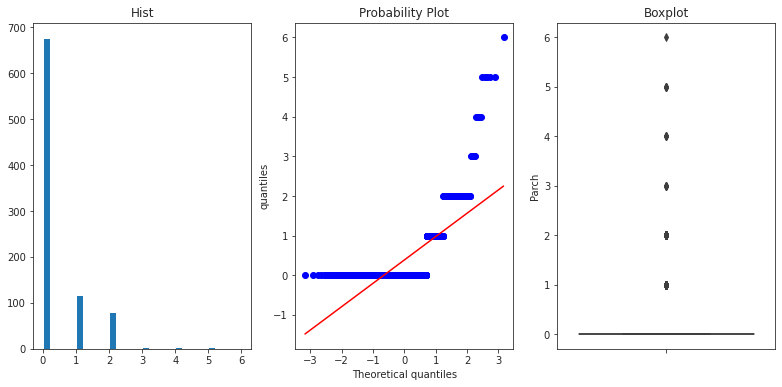

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


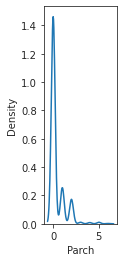

In [ ]:
get_distro(df,'Parch')

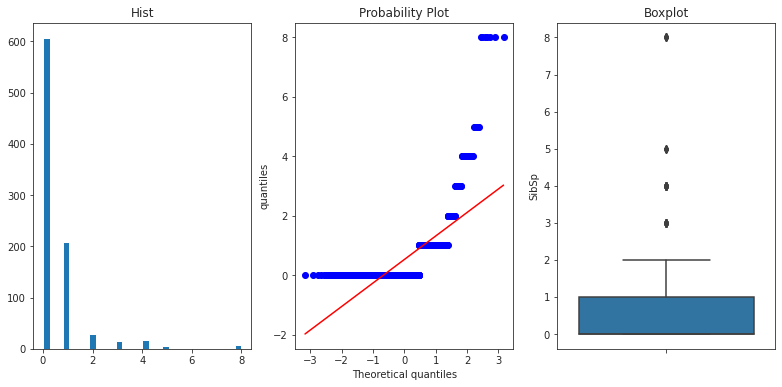

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


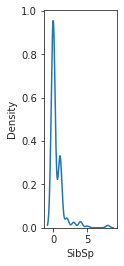

In [ ]:
get_distro(df,'SibSp')

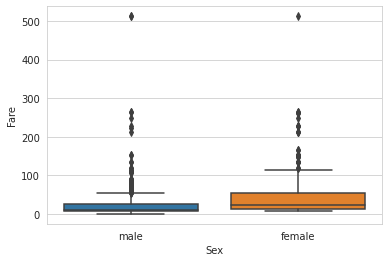

In [ ]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Sex', y = 'Fare', data = df)

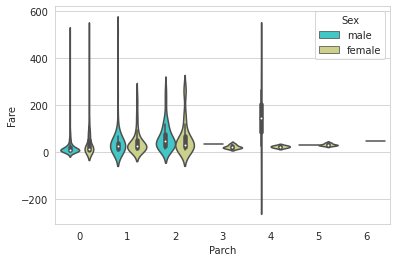

In [ ]:

sns.violinplot(x='Parch',y ='Fare',data=df,palette='rainbow',hue='Sex',splt='true')

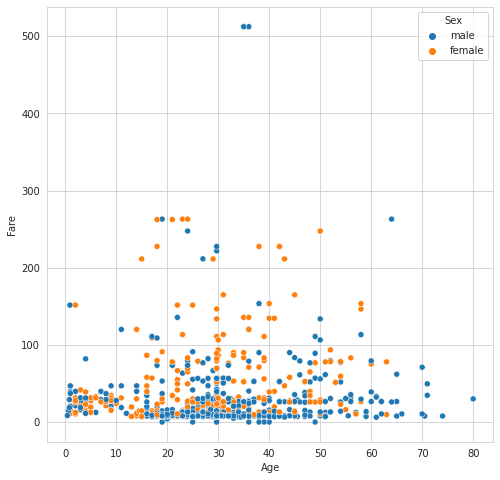

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=df)
plt.show()

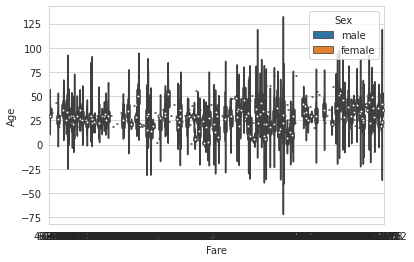

In [ ]:
sns.violinplot(x="Fare", y="Age", hue='Sex', data=df)
plt.show()

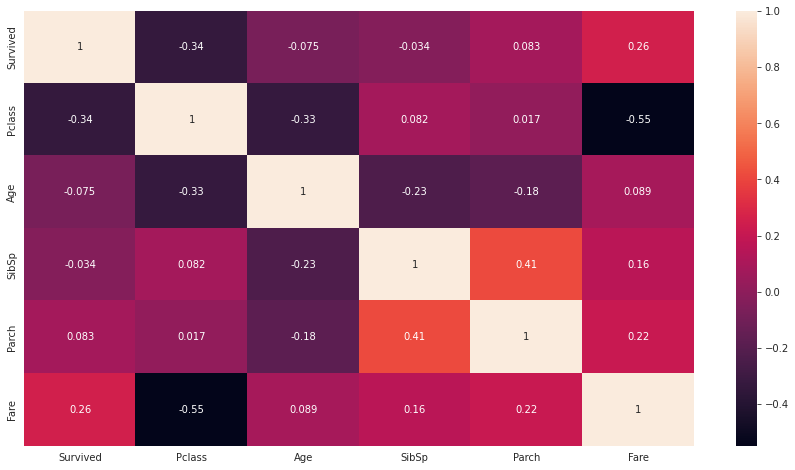

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Normal distribution conditions
# 1. mean == median
# 2. data coverage : -sigma to +sigma - 67%  , -2sigma to +2sigma - 95% , -2sigma to +3sigma - 99.5%

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


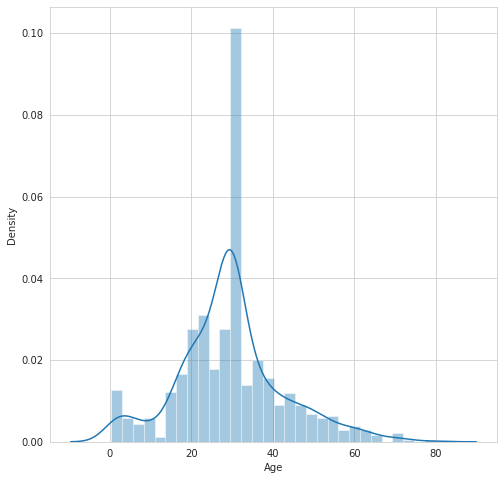

In [ ]:
# plot numerical columns

plt.figure(figsize=(8,8))
sns.distplot(df['Age'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


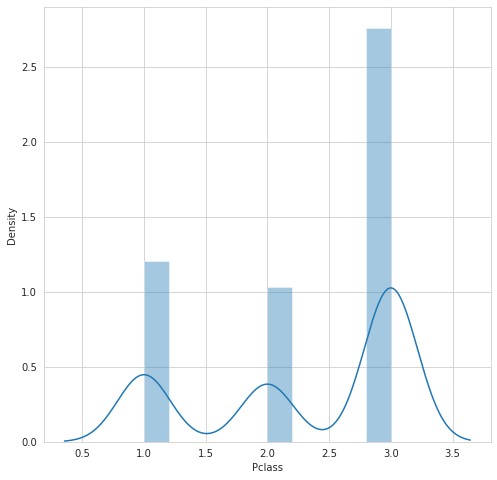

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df.Pclass)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


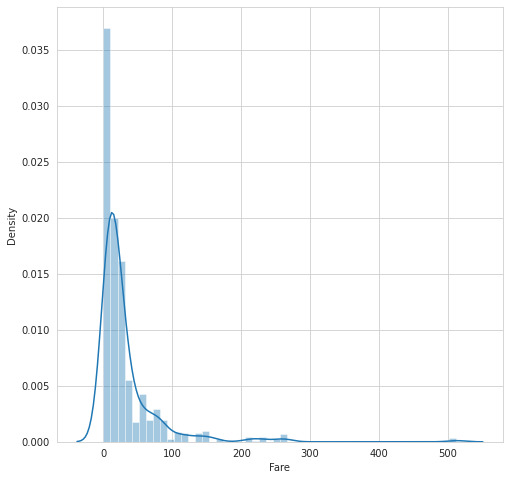

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df.Fare)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


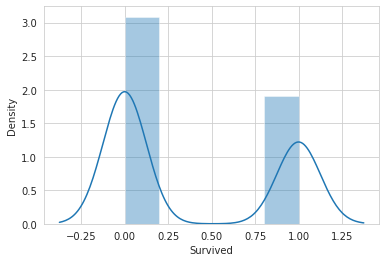

In [ ]:
sns.distplot(df.Survived)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


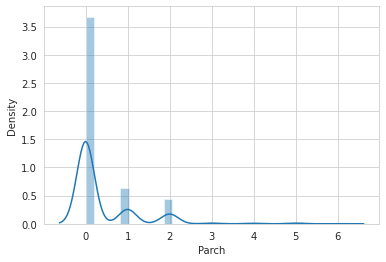

In [ ]:
sns.distplot(df.Parch)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


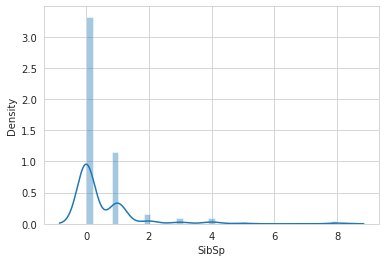

In [ ]:
sns.distplot(df.SibSp)

In [ ]:
##showing the categorical col by using Bar plot


In [ ]:
df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

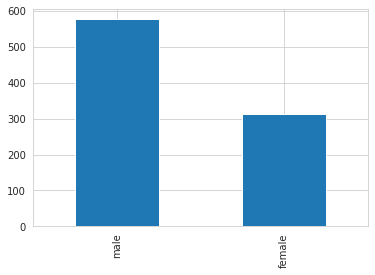

In [ ]:
df.Sex.value_counts().plot(kind='bar')

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

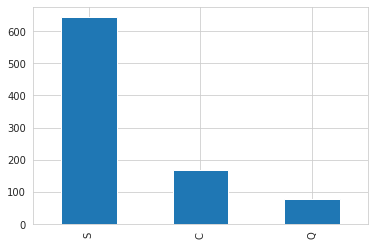

In [ ]:
df.Embarked.value_counts().plot(kind='bar')

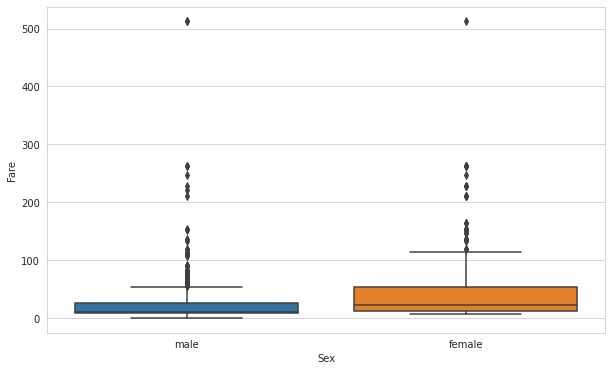

In [ ]:
## Find relation between independent categorical variables and target variables
plt.figure(figsize = (10,6))
sns.boxplot(y = 'Fare', x = 'Sex', data=df)

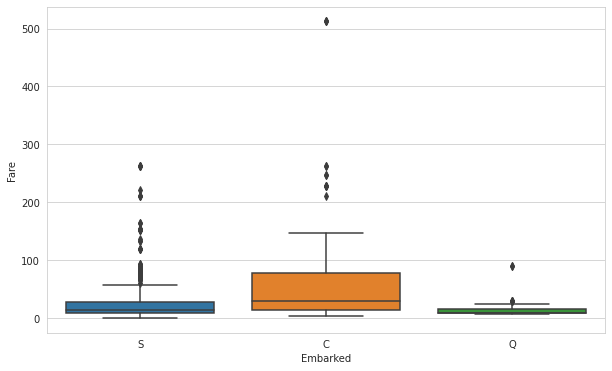

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(y = 'Fare', x = 'Embarked', data=df)

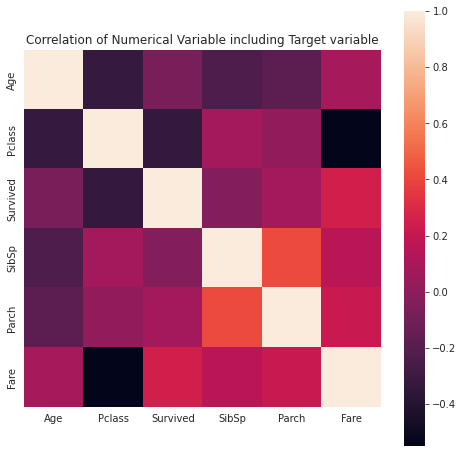

In [ ]:

# create converting negative values into a positive values
# relation between target variable into numerical variable
f, ax= plt.subplots(figsize = (8,8))
plt.title("Correlation of Numerical Variable including Target variable")

sns.heatmap(df[['Age', 'Pclass', 'Survived', 'SibSp','Parch','Fare']].corr(), square=True)

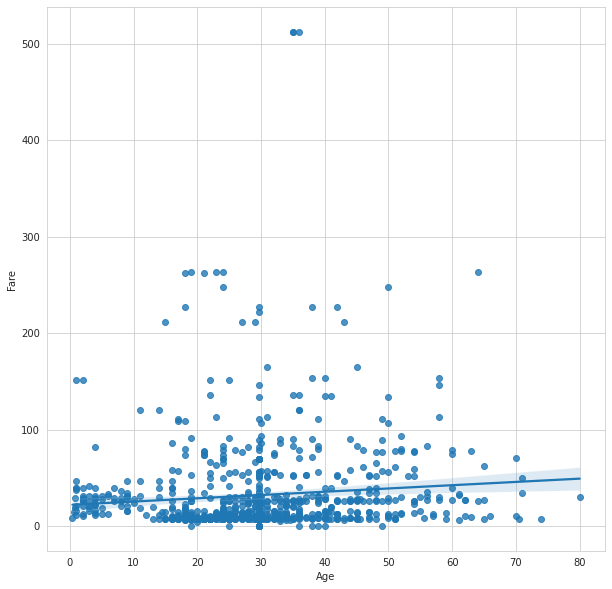

In [ ]:

plt.subplots(figsize=(10, 10))
sns.regplot(x="Age", y="Fare", data=df)
plt.show()

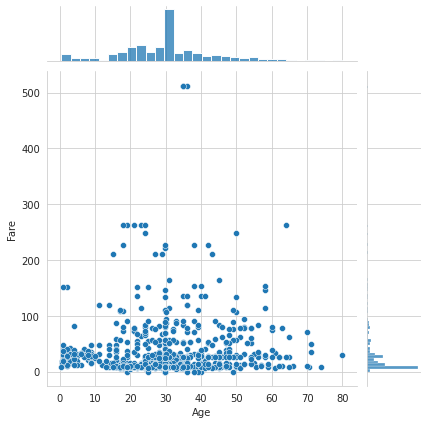

In [ ]:
sns.jointplot(x='Age',y='Fare',data=df)
plt.show()

### Outlier Detection

In [ ]:
def find_normal_outlier(df,col):
  upper_limit = df[col].mean() + 3*df[col].std()
  lower_limit = df[col].mean() - 3*df[col].std()
  return upper_limit, lower_limit

In [ ]:

find_normal_outlier(df,'Age')

(68.55854529843121, -9.25165255708271)

In [ ]:
def find_skewed_outliers(df, col, distance):

  IQR = df[col].quantile(0.75)- df[col].quantile(0.25)
  upper_limit= df[col].quantile(0.75) + (IQR*distance)
  lower_limit= df[col].quantile(0.25) - (IQR*distance)
  return lower_limit, upper_limit


In [ ]:
find_skewed_outliers(df,'Fare', 1.5)

(-26.7605, 65.6563)

In [ ]:
df['Age'].min()

0.42

In [ ]:
df['Age'].max()

80.0

In [ ]:

def detect_outliers(a):
    outliers = []
    threshold = 3
    mean = np.mean(a)
    std = np.std(a)
    
    for i in a:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers
    pass

In [ ]:
age_out = detect_outliers(df['Age'])
age_out

[71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]

In [ ]:
# Convert outliers to deletable format
# We are using this as outliers may have same value which will cause error while deleting

def process_outliers(a):
    convert_list = list(set(a))
    return convert_list

In [ ]:
list_age=process_outliers(age_out)
list_age

[70.0, 70.5, 71.0, 74.0, 80.0]

In [ ]:
def delete_outlier(a,ddf):   # a-> list of outliers, df-> dataframe from which we have to delete
    for x in a:
        df.drop(df[ddf == x].index,inplace = True)

In [ ]:
delete_outlier(list_age,df['Age'])

<ipython-input-696-3c6eca592217>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[ddf == x].index,inplace = True)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


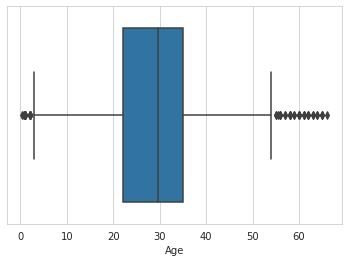

In [ ]:
## showing outlier for age
sns.boxplot(df['Age'])

## Feature Engineering
####Column transformation : OHE and Normalization

In [ ]:


## one hot encoding for categorical variable

In [ ]:
df =df.join(pd.get_dummies(df.Embarked)).drop(["Embarked"],axis=1)
df =df.join(pd.get_dummies(df.Sex)).drop(["Sex"],axis=1)

In [ ]:
## column transformation by normalization for normal distribution

In [ ]:
# Column trnsformation by logarithomic transformation
df['Age'] = np.log(df['Age']+1)


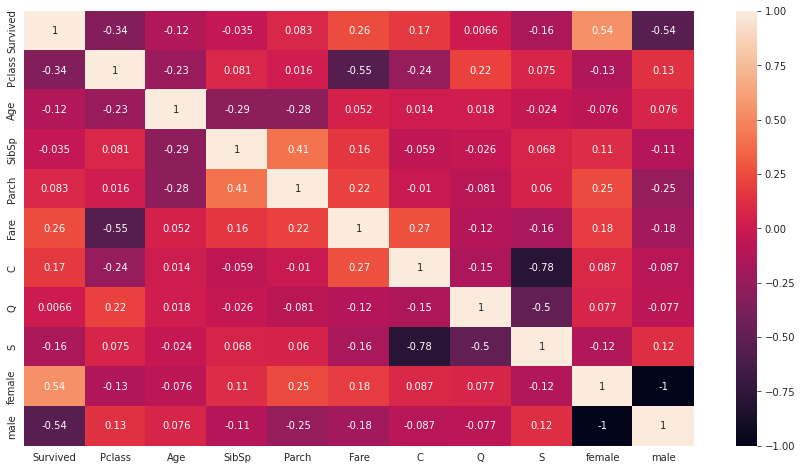

In [ ]:
## corelation after feature engineering
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
## Find the relation between two independent categorical variables
from scipy.stats import chi2_contingency
chisqt = pd.crosstab(df.Sex.astype('str'), df.Embarked.astype('str'), margins = True)

val = np.array([chisqt.iloc[0].values, chisqt.iloc[1].values])
# desired p-value - 0.01

print(chi2_contingency(val)[0:2])

AttributeError: ignored

####Modeling

## Modeling

In [ ]:
# Dropping target varaible
from sklearn.model_selection import train_test_split
x = df.drop(["Fare"],axis=1)
y = df["Fare"]

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=2 )

In [ ]:
x_train.shape, x_val.shape

((705, 10), (177, 10))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression
x_train,y_train = df.drop(["Fare"],axis=1),df["Fare"]
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred = reg.predict(x_val)

In [ ]:
pred

array([ 51.84375,  48.5    ,  42.     ,  34.     ,  90.21875,  59.     ,
        -3.46875,  28.625  ,  90.46875,  63.28125,  -2.28125,  42.625  ,
         3.75   ,  25.25   ,  62.78125,   3.125  ,  -3.25   ,  -3.71875,
        -3.15625,  35.5    ,  33.9375 ,   9.5625 ,  -2.59375,  -2.28125,
        34.875  ,  44.375  ,  58.5    ,  17.1875 ,  28.34375,  23.75   ,
        59.     ,  89.96875,  -2.46875,  82.9375 ,  52.5625 ,  29.03125,
        -3.25   ,  96.90625,  46.9375 ,  -3.375  , 117.53125,  17.5625 ,
        86.     ,  -2.46875,  29.28125,  -1.71875,  29.3125 ,  20.8125 ,
         3.90625,  35.34375,  64.71875,  32.28125,  86.625  ,  37.34375,
        -1.78125,  15.9375 ,   1.625  ,  13.53125,   3.75   ,  60.03125,
        -2.4375 ,  10.78125,  28.25   ,  53.65625,  27.6875 ,  23.5    ,
        -2.875  ,  -2.875  ,  35.25   ,  83.96875,  27.125  ,  27.6875 ,
        -3.71875,  -2.59375,   4.34375,  14.96875,  85.53125,  49.84375,
        -1.84375,  91.3125 ,  84.3125 ,  47.21875, 

In [ ]:
# R square 
reg.score(x_val,y_val)


0.5226028245966357

In [ ]:
#cofficient and intercept regression of regression
reg.coef_  ,reg.intercept_

(array([ 3.92732448e+00, -3.07254990e+01,  2.37024862e+00,  6.77722568e+00,
         1.03346041e+01, -2.03374052e+14, -2.03374052e+14, -2.03374052e+14,
        -9.26715433e+12, -9.26715433e+12]), 212641205952971.34)

In [ ]:
from sklearn.metrics import mean_squared_error

mse= mean_squared_error(pred, y_val)
mse

927.3971153545482

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_val,pred)
print(mae_train)

18.43238870056497
